# <b><center> Social Networks EDA </b></center>


## Entendimiento de los Datos:

In [631]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import re
from difflib import SequenceMatcher

## <u>Leer los datos que en el nombre contienen un mes:</u></br>
### <b>Instagram:</b>

Cargar los 12 archivos que en el nombre tienen un mes, en 3  DataFrames, uno de cada red social, donde cada uno de los cuales debe contener las siguientes columnas:

Instagram:
* Username
* Name
* Subscribers o Followers
* Country
* Authentic
* Engagement
* Category1
* Category2
* Month

In [632]:
ig_june = (
    pd.read_csv('DATA/instagramjune2022.csv')
    .assign(Month='June')
    .rename(columns={
        "instagram name": "username",
        "influencer name ":"name",
        "Category_1": "category1",
        "Category_2": "category2",
        "Subscribers count": "followers",
        "Views avg.": "country",
        "Likes avg": "authentic",
        "Comments avg.": "average",
        "Month": "month"})
)

In [633]:
ig_sep = (
    pd.read_csv('DATA/instagramsep2022.csv')
    .assign(Month='September')
    .rename(columns={
        "Instagram name": "username",
        " Name": "name",
        "Subscribers": "followers",
        "Audience country": "country",
        "Authentic engagement\n": "authentic",
        "Engagement average\r\n": "average",
        "Category_1": "category1",
        "Category_2": "category2",
        "Month": "month"})
    .drop('S.no', axis=1)
)

In [634]:
ig_nov = (
    pd.read_csv('DATA/instagramNov2022.csv')
    .assign(Month='November')
    .drop('s.no', axis=1)
    .rename(columns={
        "Name": "username",
        "Instagram Name": "name",
        "Category-1": "category1",
        "Followers": "followers",
        "\nCountry": "country",
        "Eng. (Auth.)": "authentic",
        "Eng. (Avg.)": "average",
        "Category-2": "category2",
        "Month": "month"})
)

In [635]:
ig_dec = (
    pd.read_csv('DATA/INSTAGRAMDEC2022.csv')
    .assign(Month='December')
    .rename(columns={
        "name": "username",
        "instagram name": "name",
        "Category_1": "category1",
        "Category_2": "category2",
        "Eng. (Auth.)": "authentic",
        "Eng. (Avg.)": "average",
        "Month": "month"})
)

Definiendo una función que transforma los números de texto a int en todo una columna

In [636]:
def text_int(column: pd.Series) -> pd.Series:
    return column.replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True).map(pd.eval).astype(int)

numeric_text_cols = ['followers', 'average', 'authentic']

In [637]:
ig_june = ig_june.dropna()
ig_june.loc[:, numeric_text_cols] = ig_june[numeric_text_cols].apply(cientific_int)
ig_sep.loc[:, numeric_text_cols] = ig_sep[numeric_text_cols].apply(cientific_int)
ig_nov.loc[:, numeric_text_cols] = ig_nov[numeric_text_cols].apply(cientific_int)
ig_dec.loc[:, numeric_text_cols] = ig_dec[numeric_text_cols].apply(cientific_int)

ig_months es la combinación de todos los meses, eliminando aquellos registros duplicados.
Tener cuidado con los datos numéricos, ya que son datos incompletos. Para sacar promedios se tiene que considerar los df por separado

In [639]:
ig_months = (
    pd.concat([ig_june, ig_sep, ig_nov, ig_dec], ignore_index=True)
    .drop("Rank", axis=1)
    .drop_duplicates()
)

,username,name,category1,category2,followers,country,authentic,average,month
2,_seorina,설인아 sᴇᴏʀɪɴᴀ,Lifestyle,Cinema & Actors/actresses,5700000,South Korea,728000,903500,June
0,_hakkencoser_,Hakken 八犬,Lifestyle,Photography,3500000,United States,525100,643000,June


Verificando duplicados

In [640]:
ig_months.duplicated().sum()

0

### TikTok:

In [641]:
tt_june = pd.read_csv('DATA/tiktokjune2022.csv')
tt_june = tt_june.assign(Month='June')
tt_june.head(1)

,Tiktoker,influencer name,Subscribers count,Views avg.,Likes avg,Comments avg.,Shares avg,Month
0,___nicoichi___,NICO【平成フラミンゴ】,1.3M,1.9M,225.3K,1.7K,1.1K,June


In [642]:
tt_sep= pd.read_csv('DATA/Tiktoksep2022.csv')
tt_sep = tt_sep.assign(Month='September')
tt_sep.head(1)

,S.no,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.,Month
0,1,jypestraykids,Stray Kids,13.8M,6.4M,2.3M,50.2K,34.2K,September


In [643]:
tt_nov= pd.read_csv('DATA/tiktoknov2022.csv')
tt_nov = tt_nov.assign(Month='November')
tt_nov.head(1)

,row-cell,Tiktoker name,Tiktok name,\nFollowers,Views (Avg.),Likes (Avg.),Comments (Avg.),Shares (Avg.),Month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,November


In [644]:
tt_dec= pd.read_csv('DATA/TIKTOKDEC2022.csv')
tt_dec = tt_dec.assign(Month='December')
tt_dec.head(1)

,Rank,Tiktoker name,Tiktok name,followers,views(avg),likes(avg.),comments(avg.),shares(avg.),Month
0,1,mrbeast,MrBeast,60.3M,29.2M,3.5M,30.8K,7.2K,December


### Youtube:

In [645]:
y_june= pd.read_csv('DATA/youtubejune2022.csv')
y_june = y_june.assign(Month='June')
y_june.head(1)

,channel name,youTuber,Category,Category_2,Subscribers count,Country,Views avg.,Likes avg,Comments avg.,Month
0,juptube,Galinha Pintadinha,Music & Dance,NaN,30.5M,-,0,N/A',N/A',June


In [646]:
y_sep= pd.read_csv('DATA/Youtubesep2022.csv')
y_sep = y_sep.assign(Month='September')
y_sep.head(1)

,S.no,Name,Youtuber,Country,Subscribers,Category_2,Avg. views\r\n,Avg. likes,Avg Comments,Category_3,Month
0,1,T-Series,tseries,India,224.4M,Music & Dance,141.5K,4.6K,125,NaN,September


In [647]:
y_nov= pd.read_csv('DATA/youtubenov2022.csv')
y_nov = y_nov.assign(Month='November')
y_nov.head(1)

,s.no,Youtube channel,youtuber name,Category,Followers,Country,\nViews (Avg.),Likes (Avg.),Comments (Avg.),Category-2,Month
0,1,tseries,T-Series,Music & Dance,229.5M,India,103.8K,2.8K,158,NaN,November


In [648]:
y_dec= pd.read_csv('DATA/YOUTUBEDEC2022.csv')
y_dec = y_dec.assign(Month='December')
y_dec.head(1)

,s.no,Youtube channel,youtuber name,Category,Followers,Country,\nViews (Avg.),Likes (Avg.),Comments (Avg.),Category-2,Month
0,1,tseries,T-Series,Music & Dance,229.5M,India,103.8K,2.8K,158,NaN,December


TikTok:
* Username
* Name
* Followers o Suscribers
* Views
* Likes
* Comments
* Shares
* Month

Youtube:
* Username
* Name
* Country
* Suscribers o Folowers
* Views
* Likes
* Comments
* Category1
* Category2
* Month

# Análisis instagram

### Número total de cuentas distintas en instagram: 2409

In [649]:
ig_months.username.drop_duplicates().size

1313

### Media de seguidores
Calcular el promedio de seguidores, authentic, engagement, de cada cuenta. Es decir, cada red social cuenta con 4 archivos de 4 meses distintos, si una cuenta aparece en los 4 meses, debera calcular el promedio de esos 4 meses, si una cuenta solo aparece 2 meses, se hara el promedio de esos dos meses y asi sucesivamente. SI el valor es nulo, vacio, N/A, o 0 no se debe promediar.

In [672]:
ig_means = (
    ig_months
    .groupby('username')
     # aggregate functiosn skips nan by deffault
    .aggregate({
        'followers': 'mean',
        'authentic': 'mean',
        'average': 'mean'
    })    
    .reset_index()
    .sort_values('followers', ascending=False)
)

### Metricas de Valor

Metricas de Valor de cada cuenta. Para este punto debe utilizar los promedios del punto anterior: Promedio Engagement/Promedio Followers.

In [679]:
ig_means['engagement_ratio'] = ig_means.average / ig_means.followers

In [680]:
ig_means

,username,followers,authentic,average,engagement_ratio
510,instagram,558566666.666667,316333.333333,394466.666667,0.000706
259,cristiano,494666666.666667,7066666.666667,8833333.333333,0.017857
702,leomessi,366975000.0,7100000.0,9324999.75,0.02541
674,kyliejenner,366775000.0,2950000.0,4700000.0,0.012814
1075,selenagomez,346950000.0,1750000.0,2300000.0,0.006629
...,...,...,...,...,...
378,feat.dino,2700000.0,716600.0,876400.0,0.324593
683,lalala_lfamily,2500000.0,752900.0,900400.0,0.36016
678,labels.hybe,2300000.0,891100.0,1000000.0,0.434783
647,kh1000le,2266666.666667,326933.333333,1233333.333333,0.544118


### Graficar iniciales

Graficar en un histograma el numero de cuentas que inicien por cada letra del alfabeto (Mayusculas y minusculas son tomadas de igual forma) y agrupar en una sola categoria todos los que no comiencen con una letra del alfabeto.

In [695]:
def get_inicial(name: str) -> str:
    name = str(name)
    first_is_letter = re.search(r'^[a-zA-Z]', name)
    if first_is_letter:
        return name[0].upper()
    else:
        return 'other'


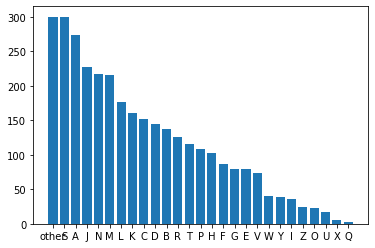

In [698]:
initials = (
    ig_months.name
    .map(get_inicial)
    .value_counts()
    .reset_index(name='frequency')
    .rename(columns={
        'name': 'letter'
    })
)
plt.bar(initials.letter, initials.frequency)
plt.show()

### ¿Cual es la cuenta de IG con mas caracteres en su nombre?

In [727]:
name_len = (
    ig_months[['name', 'username']]
    .assign(len_name = ig_months.name.map(lambda x: len(str(x))))
    .assign(len_username = ig_months.username.map(lambda x: len(str(x))))
)
ids1 = name_len.loc[name_len.len_name.idxmax()]
ids2 = name_len.loc[name_len.len_username.idxmax()]

**username**

In [728]:
ids2

name                  JUNGKOOK (전정국) Updates
username        jungkook_bighitentertainment
len_name                                  22
len_username                              28
Name: 124, dtype: object

**name**

In [729]:
ids1

name            ＡＲＡＩＫ  ＧＡＬＳＴＹＡＮ ＷＯＲＬＤ ＦＬＯＲＩＳＴ  ＤＥＳＩＧＮＥＲ
username                      araikgalstyanmoscowschool
len_name                                             39
len_username                                         25
Name: 3078, dtype: object

### ¿Cuantas cuentas de Instagram tienen ya sea en su username o name las letras de las iniciales del primer nombre de cada uno de los integrantes de tu equipo?

In [740]:
(ig_months.name.str.contains(r'[GgIiMm]') | ig_months.name.str.contains(r'[GgIiMm]')).sum()

2336

## <u>Leer los datos que en el nombre no contienen mes (resumen):</u></br>

In [ ]:
ig_resumen = pd.read_csv('DATA/instagram.csv')
ig_resumen

In [ ]:
tiktok_resumen = pd.read_csv('DATA/tiktok.csv')
tiktok_resumen

In [ ]:
youtube_resumen = pd.read_csv('DATA/youtube.csv')
youtube_resumen